# 2022-2024 NHL Games

<hr>

## Task 3 - Exploratory Data Project
#### Tim Gormly
#### 2/18/2023

<hr>

<br>
In this notebook, we will look at statistics surround the games played in the 2022-2023 NHL season.  This dataset is made available by www.hockey-reference.com.  This data can be found here: https://www.hockey-reference.com/leagues/NHL_2023_games.html.
<br>
<br>

<hr>



## 1. Load the Data

To begin, we will import Pandas and use csv_read() to load this our NHL game data into a DataFrame.

In [116]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

df = pd.read_csv('22-23_games.csv')

<hr>

## 2. View the Data

Let's take a look at the data we're working with.

In [117]:
df.head()

,Date,Visitor,G,Home,G.1,Decision,Att.,LOG,Notes
0,2022-10-07,San Jose Sharks,1.0,Nashville Predators,4.0,NaN,16648.0,2:43,at (Prague CZ)
1,2022-10-08,Nashville Predators,3.0,San Jose Sharks,2.0,NaN,17023.0,2:33,at (Prague CZ)
2,2022-10-11,Vegas Golden Knights,4.0,Los Angeles Kings,3.0,NaN,18230.0,2:31,NaN
3,2022-10-11,Tampa Bay Lightning,1.0,New York Rangers,3.0,NaN,18006.0,2:21,NaN
4,2022-10-12,Seattle Kraken,4.0,Anaheim Ducks,5.0,OT,17530.0,2:28,NaN


In [118]:
df.tail()

,Date,Visitor,G,Home,G.1,Decision,Att.,LOG,Notes
1307,2023-04-13,Vegas Golden Knights,NaN,Seattle Kraken,NaN,NaN,NaN,NaN,NaN
1308,2023-04-13,Detroit Red Wings,NaN,Tampa Bay Lightning,NaN,NaN,NaN,NaN,NaN
1309,2023-04-13,New Jersey Devils,NaN,Washington Capitals,NaN,NaN,NaN,NaN,NaN
1310,2023-04-14,Buffalo Sabres,NaN,Columbus Blue Jackets,NaN,NaN,NaN,NaN,NaN
1311,2023-04-14,Colorado Avalanche,NaN,Nashville Predators,NaN,NaN,NaN,NaN,NaN


Looking at the head of this DataFrame, we can see that we're only working with a few columns.

Let's name a few of these so that they are more descriptive and clear.



In [119]:
df.columns = ["Date", "Visiting_Team", "Visiting_Team_Goals", "Home_Team", "Home_Team_Goals", "Decision", "Attendance", "Game_Length", "Notes"]

df.head()

,Date,Visiting_Team,Visiting_Team_Goals,Home_Team,Home_Team_Goals,Decision,Attendance,Game_Length,Notes
0,2022-10-07,San Jose Sharks,1.0,Nashville Predators,4.0,NaN,16648.0,2:43,at (Prague CZ)
1,2022-10-08,Nashville Predators,3.0,San Jose Sharks,2.0,NaN,17023.0,2:33,at (Prague CZ)
2,2022-10-11,Vegas Golden Knights,4.0,Los Angeles Kings,3.0,NaN,18230.0,2:31,NaN
3,2022-10-11,Tampa Bay Lightning,1.0,New York Rangers,3.0,NaN,18006.0,2:21,NaN
4,2022-10-12,Seattle Kraken,4.0,Anaheim Ducks,5.0,OT,17530.0,2:28,NaN


In [120]:
df.tail()

,Date,Visiting_Team,Visiting_Team_Goals,Home_Team,Home_Team_Goals,Decision,Attendance,Game_Length,Notes
1307,2023-04-13,Vegas Golden Knights,NaN,Seattle Kraken,NaN,NaN,NaN,NaN,NaN
1308,2023-04-13,Detroit Red Wings,NaN,Tampa Bay Lightning,NaN,NaN,NaN,NaN,NaN
1309,2023-04-13,New Jersey Devils,NaN,Washington Capitals,NaN,NaN,NaN,NaN,NaN
1310,2023-04-14,Buffalo Sabres,NaN,Columbus Blue Jackets,NaN,NaN,NaN,NaN,NaN
1311,2023-04-14,Colorado Avalanche,NaN,Nashville Predators,NaN,NaN,NaN,NaN,NaN


Now we can see that we have:

<ul>
    <li>Index: Game number for the season</li>
    <li>Date: Date of game, YYYY-MM-DD format</li>
    <li>Visiting_Team: The name of the visiting team</li>
    <li>Visiting_Team_Goals: Goals scored by the visiting team</li>
    <li>Home_Team: The name of the home team</li>
    <li>Home_Team_Goals: Goals scored by the home team</li>
    <li>Decision: Initially this is blank if the result of the game was determined in regulation.  If the game had to go to overtime or the shootout, this is noted in this column</li>
    <li>Attendance: Number of people attending the game in person</li>
    <li>Game_Length: Length of game, H:MM format </li>
    <li>Notes: Specific notes related to game.  This is typically blank.  This is used to note if a game was played in an atypical arena.  In the head() call, we can see that games at index 0 and 1 were played in Prague, CZ.</li>
</ul>

Note that in the tail, there are a lot of fields labeled "NaN" or "Not a Number".  This is because these games are part of the 2022-2023 season, but they are for a future date and no gameplay data exists for these games yet.

<hr>

## 3. Numeric Data

Let's take a look at some of the numeric data in our new dataframe, starting with the goals scored by the home team in games so far in the 2022-2023 season.

In [121]:
(df.Home_Team_Goals).describe()

count    879.00
mean       3.21
std        1.69
min        0.00
25%        2.00
50%        3.00
75%        4.00
max        9.00
Name: Home_Team_Goals, dtype: float64

In [122]:
(df.Visiting_Team_Goals).describe()

count    879.00
mean       3.10
std        1.72
min        0.00
25%        2.00
50%        3.00
75%        4.00
max        9.00
Name: Visiting_Team_Goals, dtype: float64

Above, we saw our tail() end with index 1311, informing us that there are 1312 total games in the season (the first row is indexed at 0).  In both of these examples where we describe the goals scored by the home or visiting team, the count is 879.  This is because only 879 games have numerical values (including 0) so far this season.  In other words, 879 out of 1312 have been played.  Rows without numerical value provided in these columns are omitted.  We can see that "NaN" is listed above for the games in the tail() output.

The data between goals scored by the home team and goals scored by the visiting team are extremely similar.  The values for min, 25%, 50%, 75%, and max are all identical.  The standard deviation of goals scored by the visiting team is ever so slightly higher than that of goals scored by the home team.  The visiting team is at least slightly more volatile than the home team.  The mean goals scored by a visiting team (3.10 goals) is slightly lower than the mean goals scored by the home team (3.21 goals).  It it is often said that there is a "home team advantage" in sports.  This mean goals scored figure reinforces this, but only slightly.

<hr>

## 4. Attendance

Let's examine data for attendance in games this season.

In [123]:
(df.Attendance).describe()

count      879.00
mean     17040.91
std       2887.41
min       4600.00
25%      16407.00
50%      17850.00
75%      18532.00
max      39243.00
Name: Attendance, dtype: float64

Again, we see the same count of 879 games.  We are clearly working with much larger numbers than we were when reviewing data for scored goals.  A few things strike me as interesting.  The minimum attendance is significantly lower than 25%, 50%, 75%, and max.  Maximum attendance is also over twice as high as the 75% value.  The values for 25%, 50%, and 75% are all quite close with only 2125 separating the 25% value and 75% value.  The median value falls within this window as well, but on the low side.  All of this together makes me suspect that there is a large central concentration of attendance figures, with a significant number of outliers (particularly on the low end as we see the mean value falling below the 50% value).  A histogram may be helpful in visualizing this data.

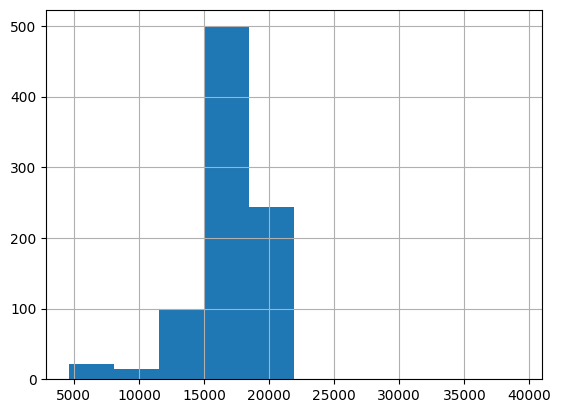

In [124]:
hist = df.Attendance.hist()

As we suspected, the majority of games seem to have attendance between that 16,400 - 18,532 range. There is a significant portion of games above 20,000 as well.  The X axis extends to 40,000.  We know there is a maximum attendance this year of 39,243.  The histogram makes this appear to be an anomoly, even compared to the number of games played with 10,000 or fewer fans in attendance.

Fans of the NHL may be aware that the Arizona Coyotes are currently not playing in an arena that is typical of a major league sports team.  Instead, they are currently playing their home games at Arizona State University's Mullet Arena which seats only 5,025.  Let's examine attendance data for Coyote's home games only, and then data for all games except for Coyote's home games.

In [125]:
coyote_games = df[df.Home_Team == 'Arizona Coyotes']

coyote_games.Attendance.describe()

count      22.0
mean     4600.0
std         0.0
min      4600.0
25%      4600.0
50%      4600.0
75%      4600.0
max      4600.0
Name: Attendance, dtype: float64

Evidently, all Arizona Coyote's home games have had identical attendance at 4,600.  There is 0.0 standard deviation in this value.  It would seem that all Arizona Coyote home games have sold out and only 4,600 tickets are available.  Even the worst-attended teams (and the Coyotes <em>would</em> traditionally be among them) have at least 9,500 fans in attendance, so it is not unusual to think that an NHL team would consistently sell 4,600 tickets.

Now let's look at games held at other arenas.

In [126]:
other_games = df[df.Home_Team != 'Arizona Coyotes']

other_games.Attendance.describe()

count      857.00
mean     17360.28
std       2114.56
min       9673.00
25%      16514.00
50%      17875.00
75%      18532.00
max      39243.00
Name: Attendance, dtype: float64

We can see quickly that our data is less disperse once Coyote's home games are ommitted.  The standard deviation in attendance fell from 2887.41 down to 2114.56.  The mean has risen to be within 515 of the 50% mark (previously 810 away).  Here is a histogram of this data.

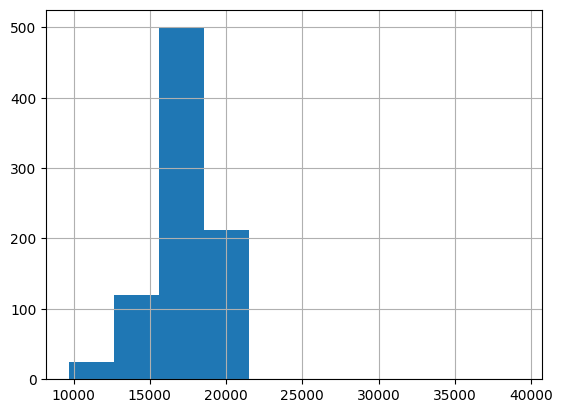

In [127]:
hist = other_games.Attendance.hist()

This is a similar shape to before, but the outliers on the low end have been heavily mitigated.  The same upper outliers are still present.

We can add a column that describes how well attended the games are.  We'll use three categories, separated by the 25% and 75% values (16,407 & 18,532).

In [128]:
low_attendance = df[df.Attendance < 16407]
average_attendance = df.loc[(df.Attendance >= 16407) & (df.Attendance < 18532)]
high_attendance = df[df.Attendance >= 18532]

low_attendance.Attendance.describe()

count      220.00
mean     13390.80
std       3278.68
min       4600.00
25%      13111.00
50%      14278.00
75%      15565.00
max      16402.00
Name: Attendance, dtype: float64

In [129]:
average_attendance.Attendance.describe()

count      429.00
mean     17697.81
std        540.70
min      16412.00
25%      17206.00
50%      17850.00
75%      18117.00
max      18528.00
Name: Attendance, dtype: float64

In [130]:
high_attendance.Attendance.describe()

count      230.00
mean     19307.07
std       1540.23
min      18532.00
25%      18679.25
50%      18992.50
75%      19471.00
max      39243.00
Name: Attendance, dtype: float64

As we can see, the majority of games fall into the average attendance dataframe at 429 games.  Similar totals of games are on either side of this average attendance dataframe.  In the high attendance dataframe, we see that the average figures are still very far away from the maximum figure of 39,243.

Each year, the NHL holds a special outdoor game called The Winter Classic.  These are typically held in baseball stadiums which can hold a far greater number of fans than a hockey rink.  A quick google search confirms that the Winter Classic attendance this season was 39,243.  Were any other games near this attendance?

In [131]:
attendance_check = df[df.Attendance >= 35000]

attendance_check.Attendance.describe()

count        1.0
mean     39243.0
std          NaN
min      39243.0
25%      39243.0
50%      39243.0
75%      39243.0
max      39243.0
Name: Attendance, dtype: float64

No other games had at least 35,000 fans in attendance.  Let's check another boundary.

In [132]:
attendance_check = df[df.Attendance >= 30000]

attendance_check.Attendance.describe()

count        1.0
mean     39243.0
std          NaN
min      39243.0
25%      39243.0
50%      39243.0
75%      39243.0
max      39243.0
Name: Attendance, dtype: float64

The same is true for games with 30,000 or more fans.

In [133]:
attendance_check = df[df.Attendance >= 25000]

attendance_check.Attendance.describe()

count        1.0
mean     39243.0
std          NaN
min      39243.0
25%      39243.0
50%      39243.0
75%      39243.0
max      39243.0
Name: Attendance, dtype: float64

The Winter Classic has also been the only game above 25,000 in attendance.  Let's continue until we find another game.

In [134]:
attendance_check = df[df.Attendance >= 20000]

attendance_check.Attendance.describe()

count       35.00
mean     21471.74
std       3111.54
min      20016.00
25%      21105.00
50%      21105.00
75%      21105.00
max      39243.00
Name: Attendance, dtype: float64

Other than The Winter Classic, only 34 games have had attendance of at least 20,000 fans.  The 25%, 50%, and 75% figures are all the same.  After seeing the data for the Arizona Coyotes, I'm tempted to assume that one of the NHL arenas seats 21,105 fans and has been sold out many times this season.  Reviewing NHL arenas by capacity on Wikipedia (https://en.wikipedia.org/wiki/List_of_ice_hockey_arenas_by_capacity) we see that the Montreal Canadiens' arena seats 21,105.

## 4. Home Team Advantage

Earlier, when viewing the data related to goals scored, we saw that there is the slightest bit of evidence pointing to a true "home field advantage".  Let's explore other data to see if we can find more evidence of this.

To start, we should add a column to our dataframe to describe the winner of the game, the home team or the visiting team.

In [135]:
# add an empty column to place our results
df['Winner'] = pd.Series()

# where home team goals are greater than visiting goals, the home team won
df['Winner'].where(~(df['Home_Team_Goals'] > df['Visiting_Team_Goals']), other="Home Team", inplace=True)

# where visiting team goals are greater than home goals, the visiting team won
df['Winner'].where(~(df['Visiting_Team_Goals'] > df['Home_Team_Goals']), other="Visiting Team", inplace=True)

df.Winner.describe()

C:\Users\timgo\AppData\Local\Temp\ipykernel_6492\2746269034.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Winner'] = pd.Series()


count           879
unique            2
top       Home Team
freq            462
Name: Winner, dtype: object

Now that we've made category data that describes the winner of a game, we can describe it.  Out of 879 games played, 462 have been won by the home team.  52.55% of games have been won by the home team.  This seems to me to be a more significant figure than home teams scoring slightly greater numbers of goals on average than visiting teams.

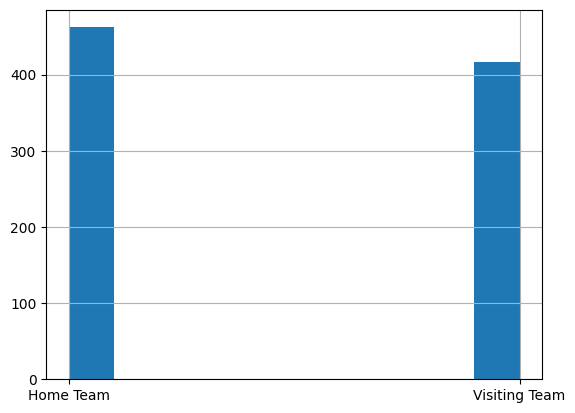

In [136]:
hist = df.Winner.hist()

A histogram shows that home teams win significantly more games than visiting teams.